In [1]:
# working on boundaries

In [2]:
import csv
import matplotlib.pyplot as plt
import polygon as plo

In [3]:
#
def get_highdepth_boundary(szone):
    catfile = {'hik':'hikinterfacegrid_highres.csv', 
           'puy': 'puyinterfacegrid_highres.csv'}
    xlon, xlat, xdep = [],[],[]
    with open(catfile[szone], mode='r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)
        next(csv_reader)
        for row in csv_reader:
            xlon.append(float(row[0]))
            xlat.append(float(row[1]))
            xdep.append(float(row[2]))

    blon, blat = plo.boundary(xlon, xlat, alpha =0.25, only_outer = True)
    plt.scatter(xlon, xlat, c=xdep)
    plt.plot(blon, blat, 'r-')
    plt.colorbar();
    return blon, blat

/home/kirant/thinglap/NSHM-projects/nz-oq-slab/model-development/4MidSlab/polygon.py:63: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(s * (s - a) * (s - b) * (s - c))


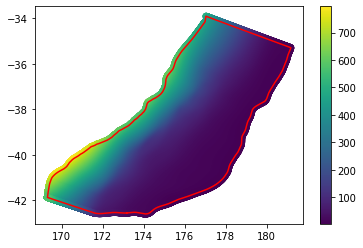

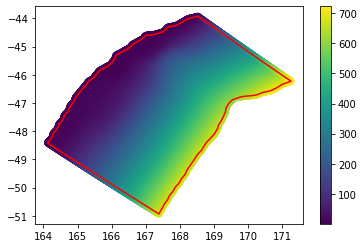

In [4]:
blon_hik, blat_hik = get_highdepth_boundary('hik')
plt.show()
blon_puy, blat_puy = get_highdepth_boundary('puy')

In [5]:
deep_interface_bounds = {'hik':[blon_hik, blat_hik], 'puy': [blon_puy, blat_puy]}

In [6]:
import json

with open("deep_interface_bounds.json", "w") as f:
    json.dump(deep_interface_bounds, f)
